## Functions for initial preprocessing D1NAMO:

`parse_compress_csv`: Handles reading and preprocessing the .csv files.

`save_to_feather`: Saves the processed data with the correct naming convention.

`process_person_data`: Processes all .csv files for a single person.

`process_all_data`: Iterates over all person_id directories.


In [6]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Set the base directory for reading and saving files
BASE_DIR = os.path.expanduser("~/Downloads/diabetes_subset_ecg_data")
#RAW_DATA_DIR = os.path.join(os.path.dirname(BASE_DIR), "raw_data")  # Save raw_data in the root folder
RAW_DATA_DIR = "../raw_data/ecg"  # Directory to save processed files
#/Users/jenniferdanielonwuchekwa/code/sasha17demin/hypopredict/raw_data


# Ensure the raw_data directory exists
os.makedirs(RAW_DATA_DIR, exist_ok=True)

In [7]:
def parse_compress_csv(file_path, signal_type="EcgWaveform"):
    """
    Reads and compresses a CSV file, parsing dates and setting datetime index.
    """
    print(f"Processing file: {file_path}")
    csv_size = os.path.getsize(file_path) / 1024**2
    print(f"Original CSV file size: {csv_size:.2f} MB")

    # Read and preprocess the CSV file
    df = pd.read_csv(file_path, dtype={signal_type: 'uint16'}, parse_dates=['Time'])
    df['datetime'] = pd.to_datetime(df['Time'], dayfirst=True, format='%d/%m/%Y %H:%M:%S.%f')
    df.drop(columns=['Time'], inplace=True)
    df.set_index('datetime', inplace=True)

    return df

In [8]:
def save_to_feather(df, file_path, person_id, signal_type="EcgWaveform"):
    """
    Saves the processed DataFrame to a feather file in the raw_data directory.
    """
    # Extract metadata from the file path
    #file_name = os.path.basename(file_path).replace('.csv', '')
    #dataset_name = os.path.basename(BASE_DIR)
    #new_feather = os.path.join(RAW_DATA_DIR, f"{dataset_name}_{person_id}_sensor_ecg.feather")
    # Define the new naming convention
    new_feather = os.path.join(RAW_DATA_DIR, f"d1namo_t1d_ecg_{person_id}.feather")
    
    # Save to feather format
    df.to_feather(new_feather)
    feather_size = os.path.getsize(new_feather) / 1024**2
    print(f"Saved to feather: {new_feather} ({feather_size:.2f} MB)")

    return new_feather

In [9]:
def process_person_data(person_dir, person_id, signal_type="EcgWaveform"):
    """
    Processes all sensor data files for a single person.
    """
    csv_files = glob.glob(os.path.join(person_dir, "*.csv"))
    print(f"Detected CSV files for person {person_id}: {csv_files}")

    for file_path in csv_files:
        # Parse and compress the CSV file
        df = parse_compress_csv(file_path, signal_type=signal_type)

        # Save the compressed data to feather format
        new_feather_path = save_to_feather(df, file_path, person_id, signal_type=signal_type)

        # Optional: Plot a segment for visual inspection
        print(f"Visualizing data from: {new_feather_path}")
        df.iloc[15000:15000*3].plot(y=signal_type, figsize=(11, 3))
        plt.show()

        # Clean up memory
        del df

Detected person directories: ['/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/007', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/009', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/008', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/001', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/003', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002']

Processing data for person 007 in directory: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/007
Detected CSV files for person 007: ['/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/007/2014_10_04-08_27_21_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabet

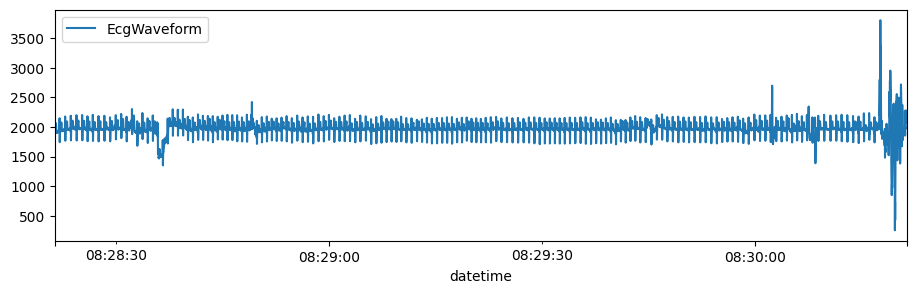

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/007/2014_10_01-08_42_43_ECG.csv
Original CSV file size: 374.70 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_007.feather (84.40 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_007.feather


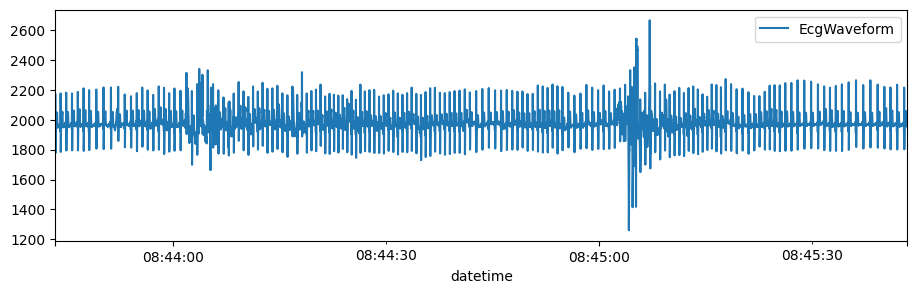

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/007/2014_10_02-07_52_44_ECG.csv
Original CSV file size: 270.63 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_007.feather (63.03 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_007.feather


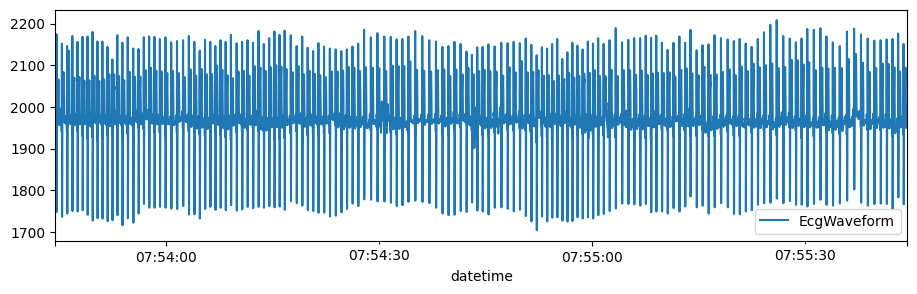

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/007/2014_10_03-06_46_57_ECG.csv
Original CSV file size: 495.25 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_007.feather (111.85 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_007.feather


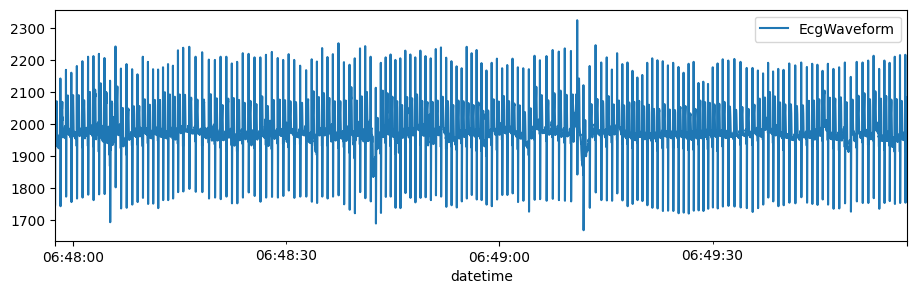


Processing data for person 009 in directory: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/009
Detected CSV files for person 009: ['/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/009/2014_10_01-05_59_30_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/009/2014_10_02-06_14_52_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/009/2014_10_03-08_21_59_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/009/2014_10_04-15_03_37_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/009/2014_10_04-09_09_29_ECG.csv']
Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/009/2014_10_01-05_59_30_ECG.csv
Original CSV file size: 317.10 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_009.feather (73.59 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_009.feather


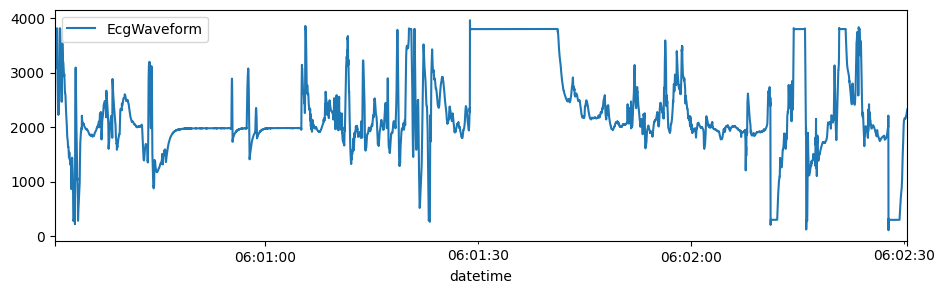

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/009/2014_10_02-06_14_52_ECG.csv
Original CSV file size: 357.45 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_009.feather (82.11 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_009.feather


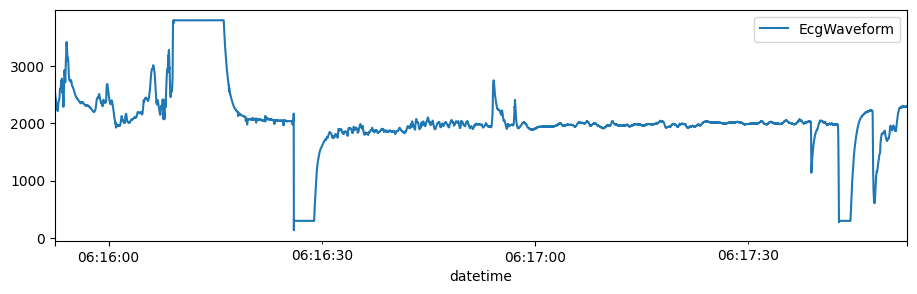

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/009/2014_10_03-08_21_59_ECG.csv
Original CSV file size: 292.84 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_009.feather (66.40 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_009.feather


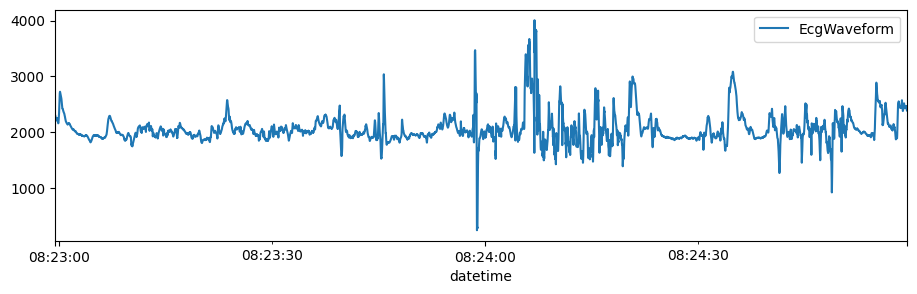

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/009/2014_10_04-15_03_37_ECG.csv
Original CSV file size: 191.67 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_009.feather (41.41 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_009.feather


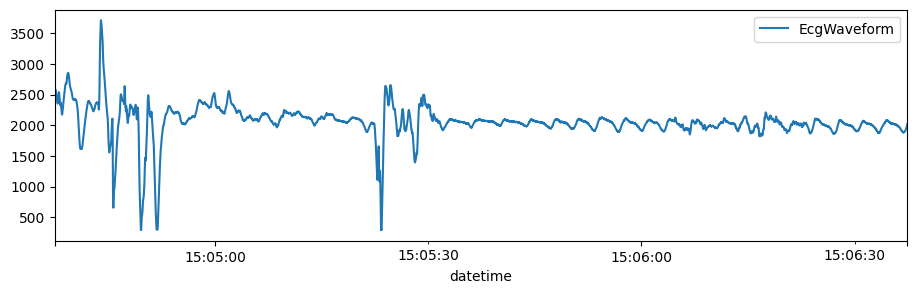

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/009/2014_10_04-09_09_29_ECG.csv
Original CSV file size: 146.77 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_009.feather (32.77 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_009.feather


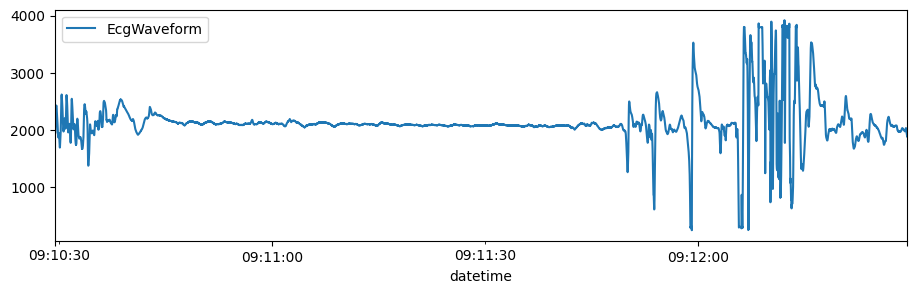


Processing data for person 008 in directory: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/008
Detected CSV files for person 008: ['/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/008/2014_10_01-06_43_00_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/008/2014_10_03-10_51_39_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/008/2014_10_03-22_54_51_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/008/2014_10_02-10_13_52_ECG.csv']
Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/008/2014_10_01-06_43_00_ECG.csv
Original CSV file size: 382.12 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_008.feather (85.53 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_008.feather


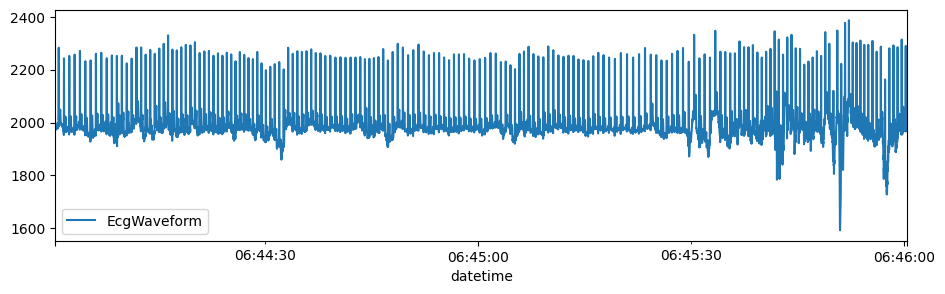

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/008/2014_10_03-10_51_39_ECG.csv
Original CSV file size: 300.02 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_008.feather (64.46 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_008.feather


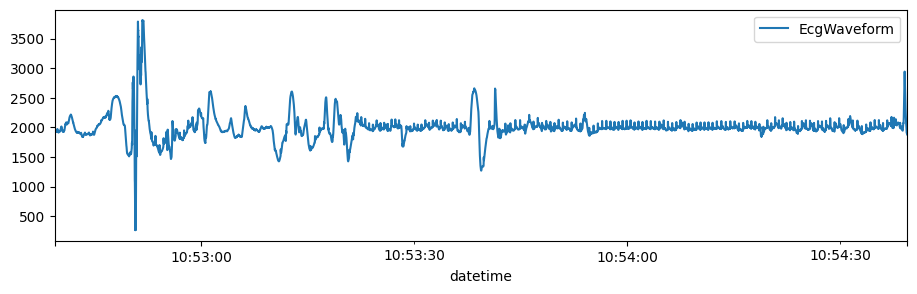

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/008/2014_10_03-22_54_51_ECG.csv
Original CSV file size: 228.29 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_008.feather (47.64 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_008.feather


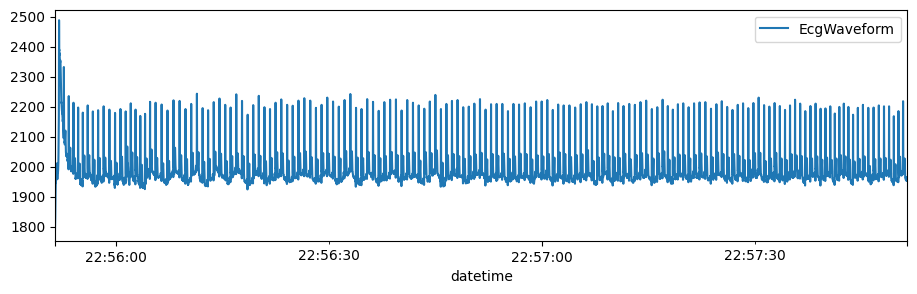

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/008/2014_10_02-10_13_52_ECG.csv
Original CSV file size: 428.38 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_008.feather (92.02 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_008.feather


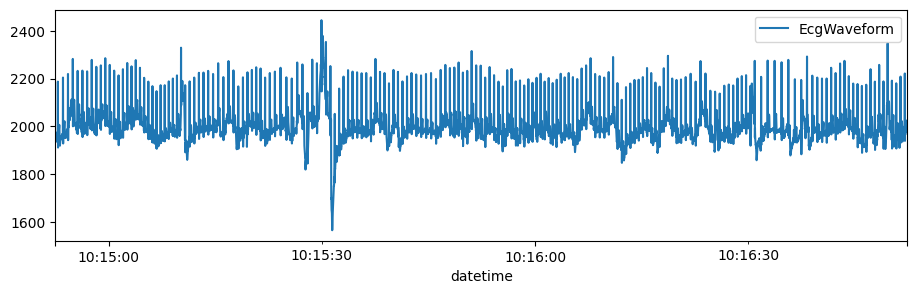


Processing data for person 001 in directory: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/001
Detected CSV files for person 001: ['/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/001/2014_10_03-06_36_24_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/001/2014_10_04-06_34_57_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/001/2014_10_01-10_09_39_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/001/2014_10_02-10_56_44_ECG.csv']
Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/001/2014_10_03-06_36_24_ECG.csv
Original CSV file size: 316.69 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_001.feather (71.04 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_001.feather


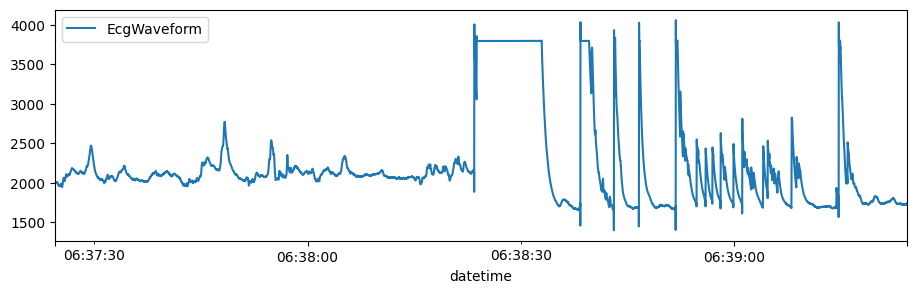

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/001/2014_10_04-06_34_57_ECG.csv
Original CSV file size: 179.65 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_001.feather (39.22 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_001.feather


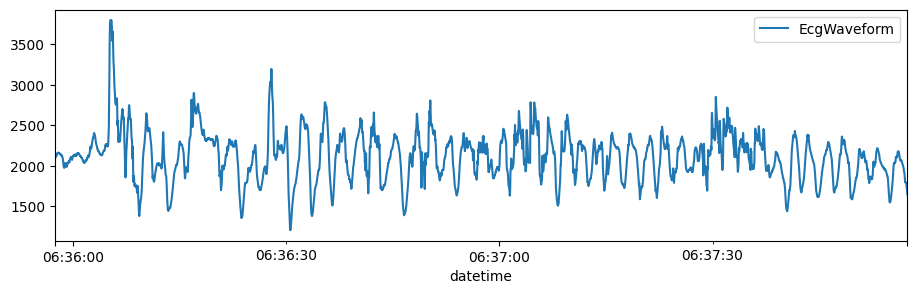

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/001/2014_10_01-10_09_39_ECG.csv
Original CSV file size: 304.35 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_001.feather (68.00 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_001.feather


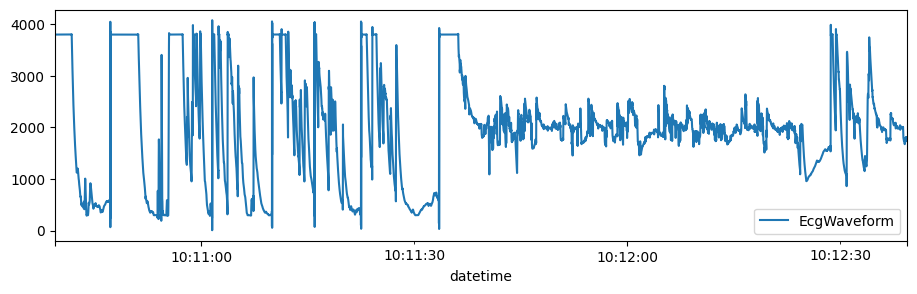

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/001/2014_10_02-10_56_44_ECG.csv
Original CSV file size: 267.28 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_001.feather (59.74 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_001.feather


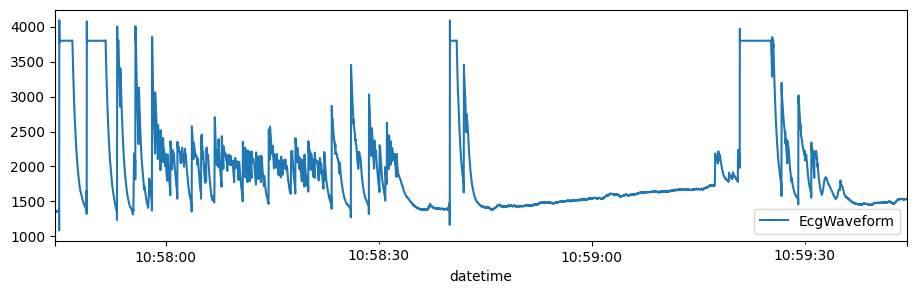


Processing data for person 006 in directory: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006
Detected CSV files for person 006: ['/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006/2014_10_01-06_46_44_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006/2014_10_04-10_30_26_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006/2014_10_01-15_08_04_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006/2014_10_03-08_57_56_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006/2014_10_02-15_13_03_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006/2014_10_02-08_03_53_ECG.csv']
Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006/2014_10_01-06_46_44_ECG.csv
Original CSV file size: 207.92 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_006.feather (45.81 MB)
Visualizing d

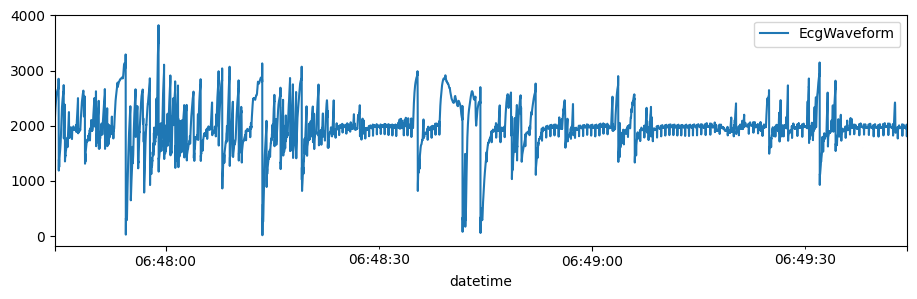

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006/2014_10_04-10_30_26_ECG.csv
Original CSV file size: 284.86 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_006.feather (61.16 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_006.feather


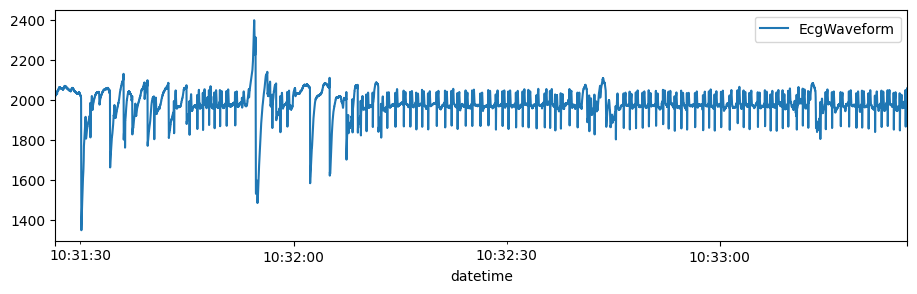

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006/2014_10_01-15_08_04_ECG.csv
Original CSV file size: 275.19 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_006.feather (60.33 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_006.feather


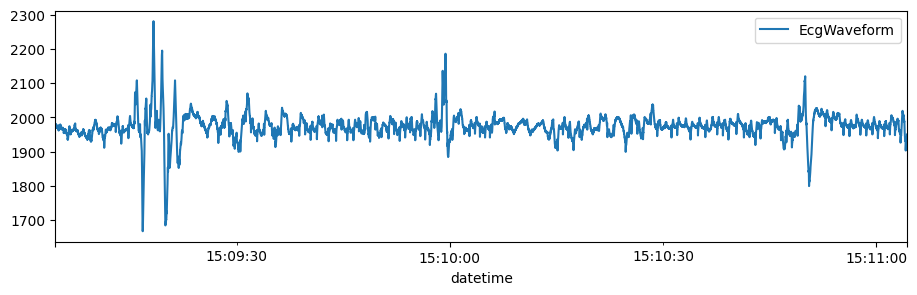

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006/2014_10_03-08_57_56_ECG.csv
Original CSV file size: 347.08 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_006.feather (76.73 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_006.feather


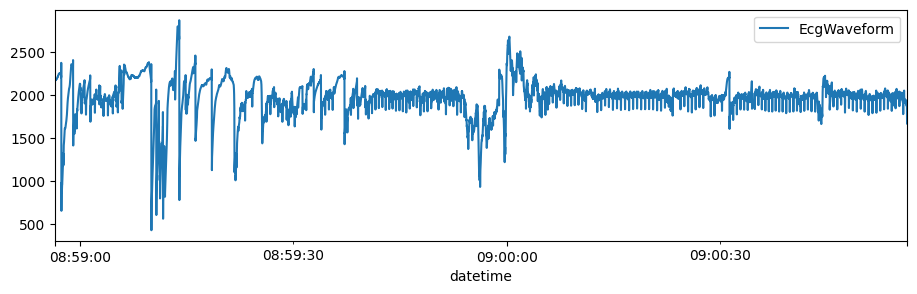

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006/2014_10_02-15_13_03_ECG.csv
Original CSV file size: 158.20 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_006.feather (34.63 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_006.feather


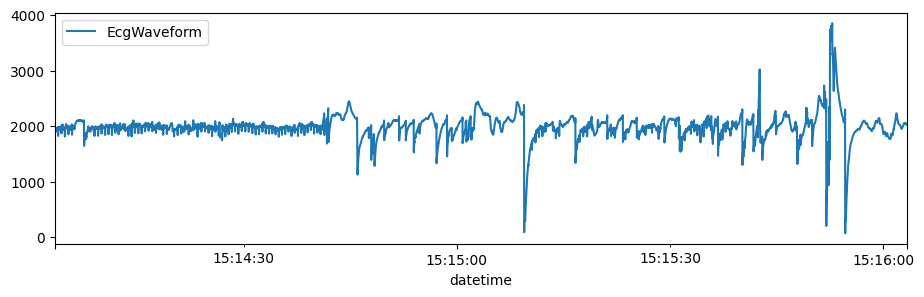

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/006/2014_10_02-08_03_53_ECG.csv
Original CSV file size: 118.07 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_006.feather (26.80 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_006.feather


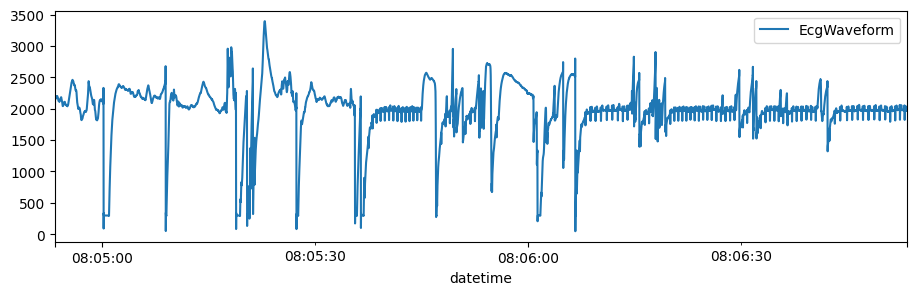


Processing data for person 003 in directory: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/003
Detected CSV files for person 003: ['/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/003/2014_10_03-00_54_40_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/003/2014_10_01-06_00_57_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/003/2014_10_04-05_33_24_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/003/2014_10_03-18_06_15_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/003/2014_10_02-09_24_32_ECG.csv']
Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/003/2014_10_03-00_54_40_ECG.csv
Original CSV file size: 100.19 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_003.feather (19.84 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_003.feather


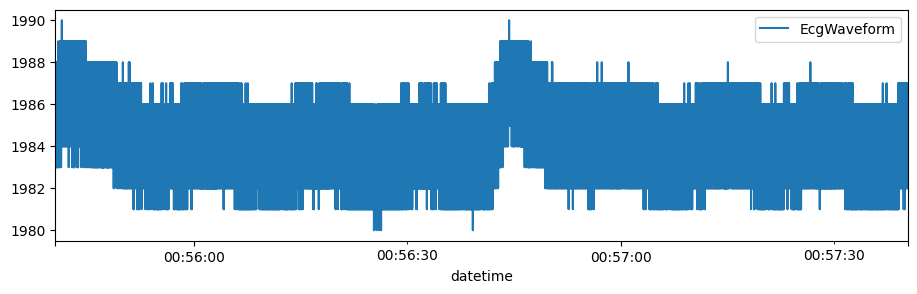

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/003/2014_10_01-06_00_57_ECG.csv
Original CSV file size: 402.67 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_003.feather (89.60 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_003.feather


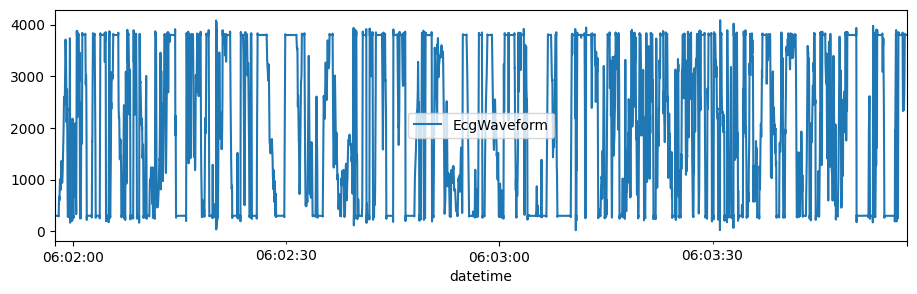

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/003/2014_10_04-05_33_24_ECG.csv
Original CSV file size: 242.19 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_003.feather (54.37 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_003.feather


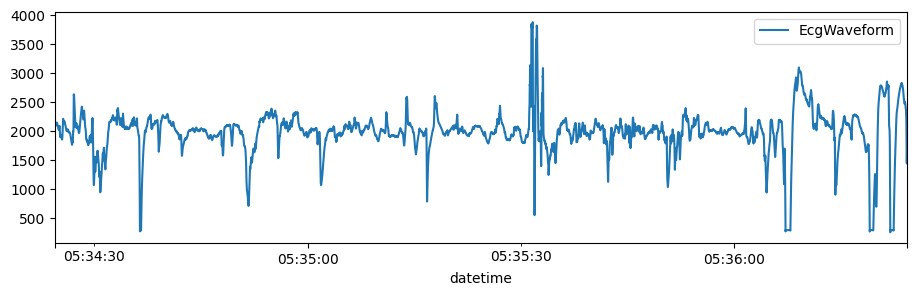

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/003/2014_10_03-18_06_15_ECG.csv
Original CSV file size: 85.22 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_003.feather (18.75 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_003.feather


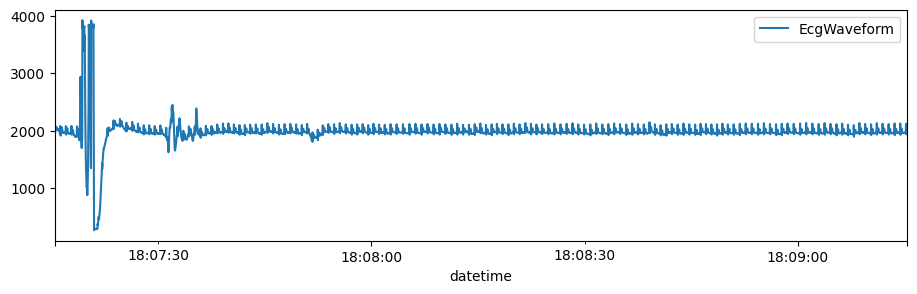

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/003/2014_10_02-09_24_32_ECG.csv
Original CSV file size: 385.85 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_003.feather (80.69 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_003.feather


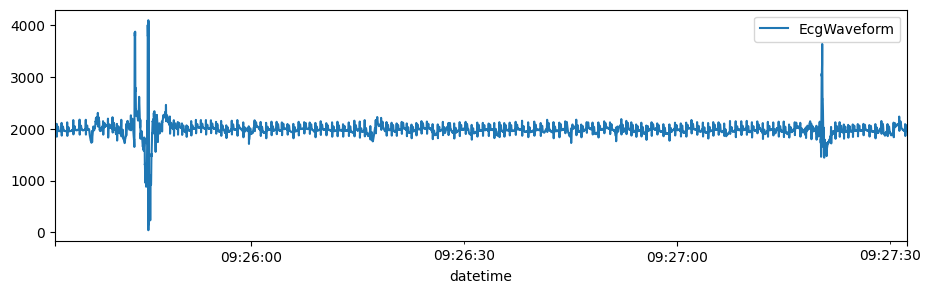


Processing data for person 004 in directory: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004
Detected CSV files for person 004: ['/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004/2014_10_01-19_33_00_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004/2014_10_01-06_55_10_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004/2014_10_03-08_05_42_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004/2014_10_04-06_32_58_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004/2014_10_04-16_49_30_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004/2014_10_02-07_21_06_ECG.csv']
Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004/2014_10_01-19_33_00_ECG.csv
Original CSV file size: 10.61 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_004.feather (2.27 MB)
Visualizing dat

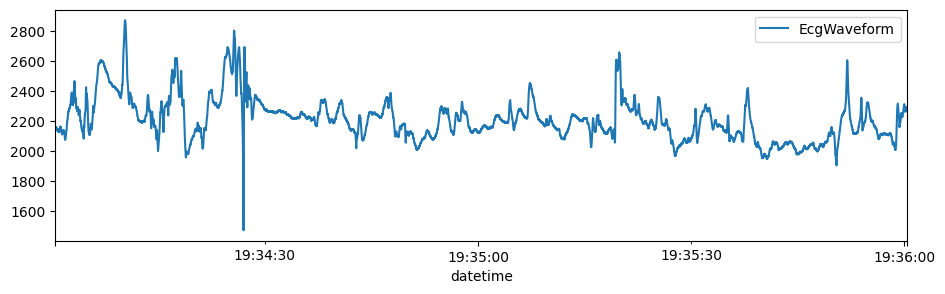

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004/2014_10_01-06_55_10_ECG.csv
Original CSV file size: 290.76 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_004.feather (63.30 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_004.feather


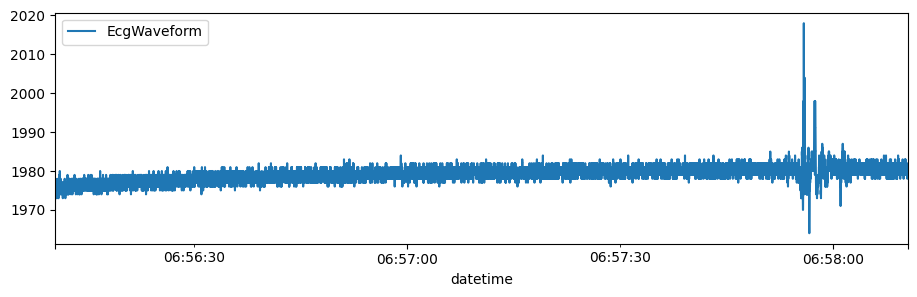

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004/2014_10_03-08_05_42_ECG.csv
Original CSV file size: 199.74 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_004.feather (45.06 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_004.feather


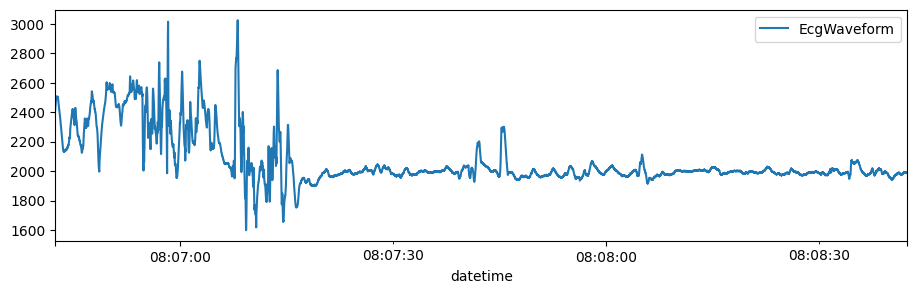

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004/2014_10_04-06_32_58_ECG.csv
Original CSV file size: 255.60 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_004.feather (57.26 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_004.feather


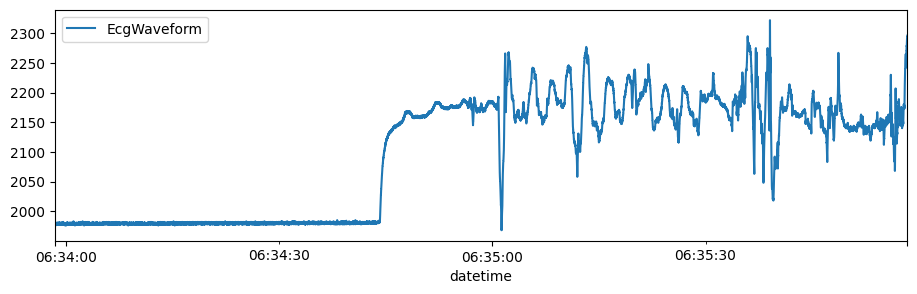

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004/2014_10_04-16_49_30_ECG.csv
Original CSV file size: 23.39 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_004.feather (5.18 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_004.feather


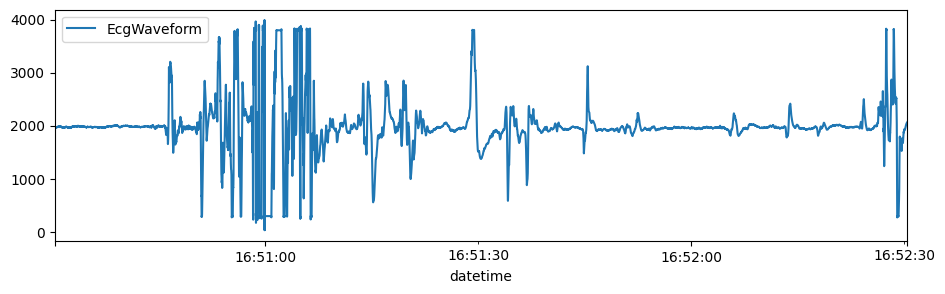

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/004/2014_10_02-07_21_06_ECG.csv
Original CSV file size: 306.48 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_004.feather (69.43 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_004.feather


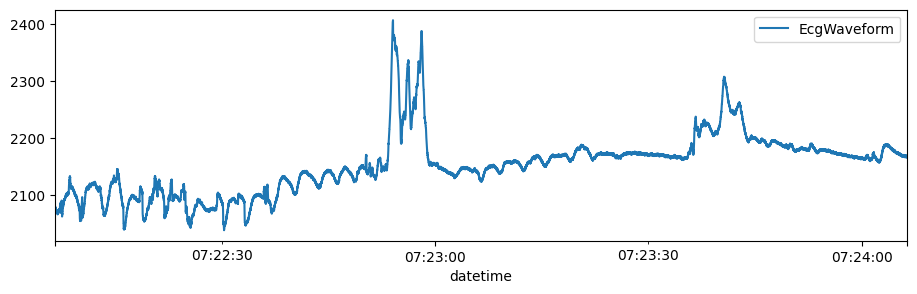


Processing data for person 005 in directory: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005
Detected CSV files for person 005: ['/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005/2014_10_03-08_42_25_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005/2014_10_02-09_23_58_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005/2014_10_01-10_40_51_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005/2014_10_02-11_40_30_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005/2014_10_01-10_27_42_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005/2014_10_04-08_02_17_ECG.csv']
Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005/2014_10_03-08_42_25_ECG.csv
Original CSV file size: 349.60 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_005.feather (78.86 MB)
Visualizing d

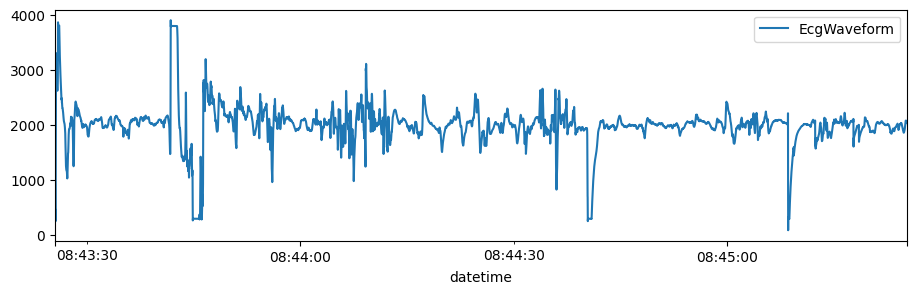

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005/2014_10_02-09_23_58_ECG.csv
Original CSV file size: 56.60 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_005.feather (12.89 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_005.feather


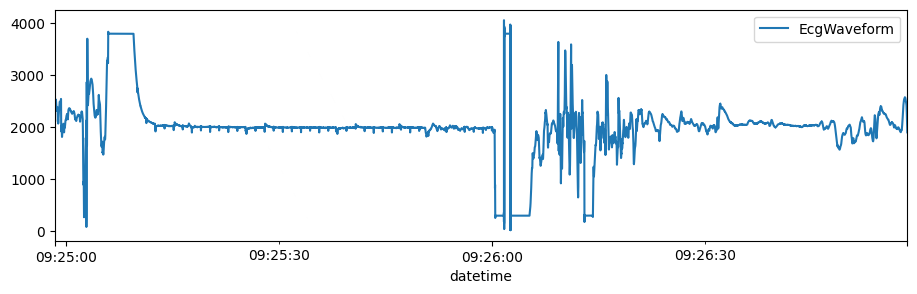

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005/2014_10_01-10_40_51_ECG.csv
Original CSV file size: 292.98 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_005.feather (68.34 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_005.feather


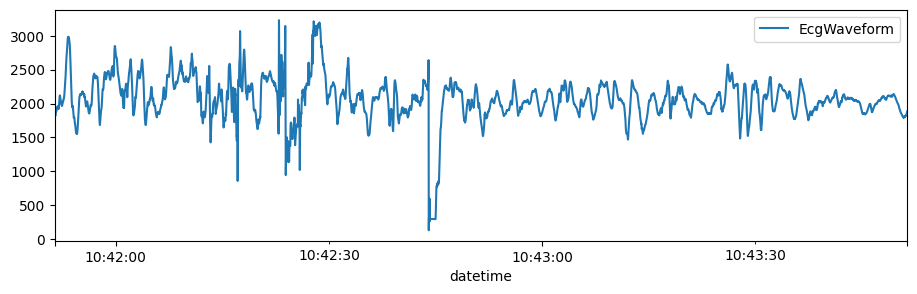

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005/2014_10_02-11_40_30_ECG.csv
Original CSV file size: 282.53 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_005.feather (63.83 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_005.feather


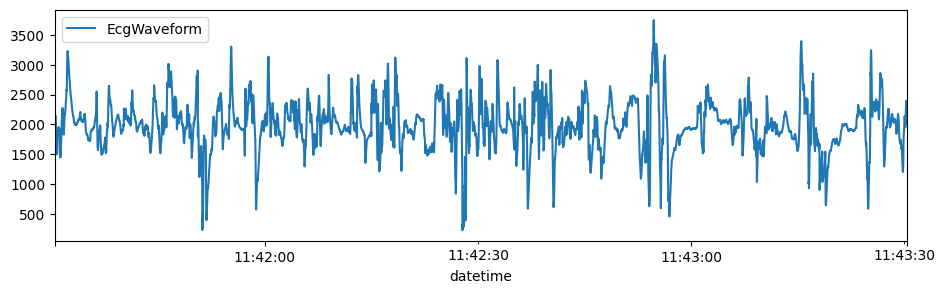

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005/2014_10_01-10_27_42_ECG.csv
Original CSV file size: 0.79 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_005.feather (0.18 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_005.feather


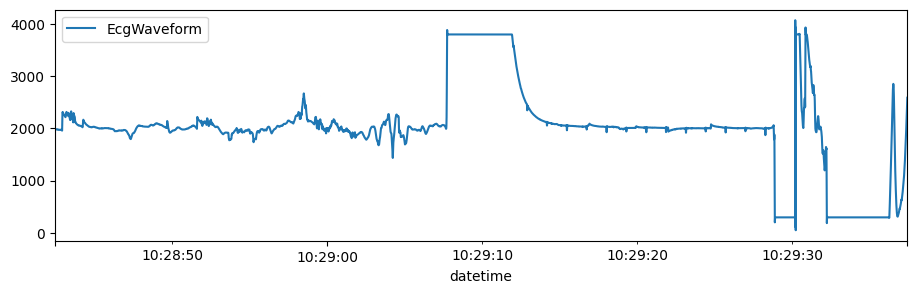

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/005/2014_10_04-08_02_17_ECG.csv
Original CSV file size: 182.52 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_005.feather (40.38 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_005.feather


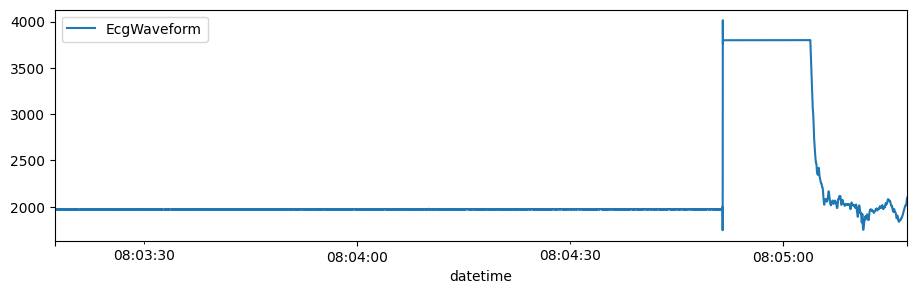


Processing data for person 002 in directory: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002
Detected CSV files for person 002: ['/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_04-07_01_03_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_01-12_35_54_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_02-06_44_21_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_03-06_33_20_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_01-20_29_57_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_04-17_43_12_ECG.csv', '/Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_03-14_06_08_ECG.csv']
Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_04-07_01_03_ECG.csv
Original CSV file

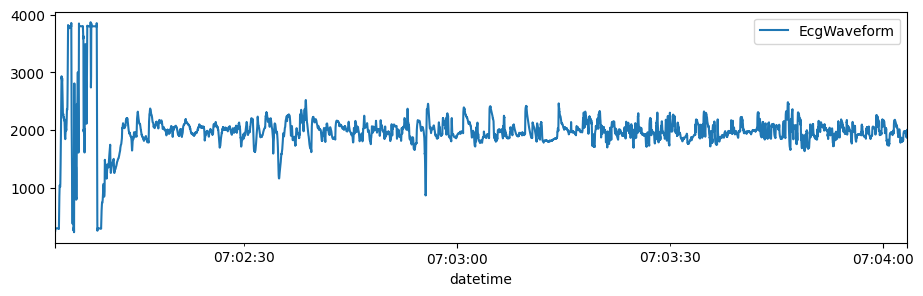

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_01-12_35_54_ECG.csv
Original CSV file size: 191.80 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_002.feather (42.70 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_002.feather


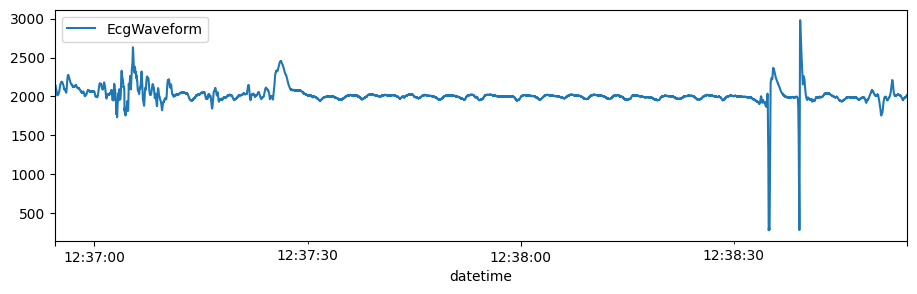

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_02-06_44_21_ECG.csv
Original CSV file size: 330.41 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_002.feather (74.02 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_002.feather


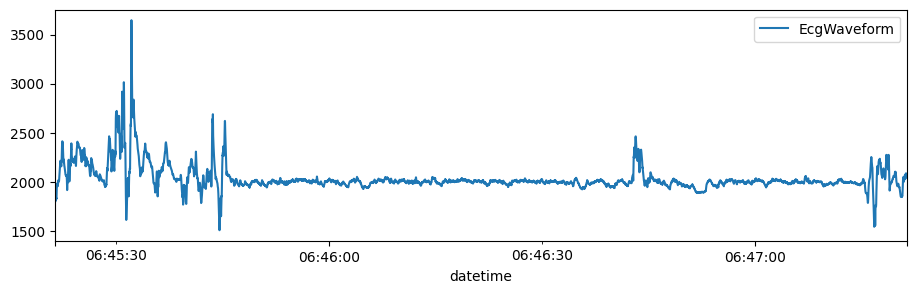

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_03-06_33_20_ECG.csv
Original CSV file size: 176.90 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_002.feather (39.28 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_002.feather


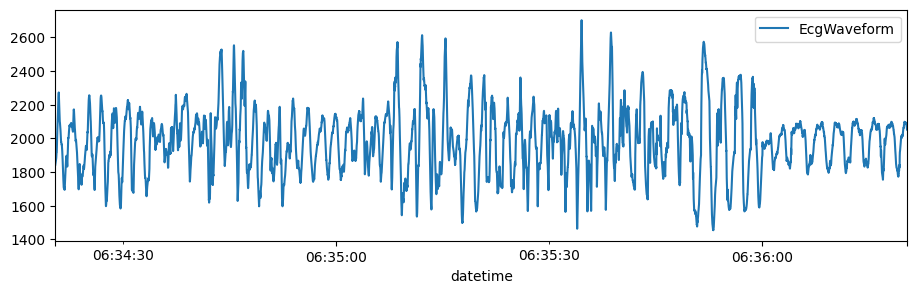

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_01-20_29_57_ECG.csv
Original CSV file size: 0.07 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_002.feather (0.02 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_002.feather


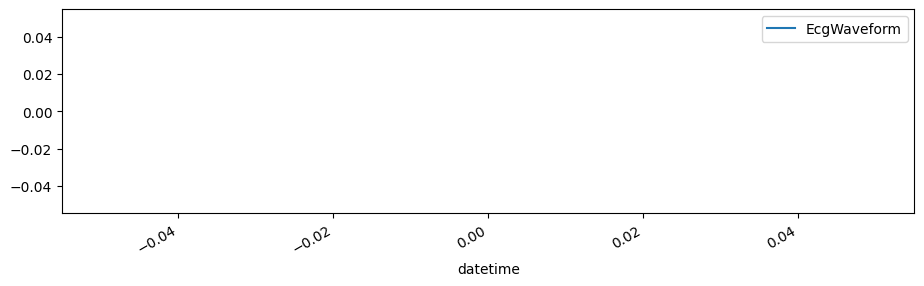

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_04-17_43_12_ECG.csv
Original CSV file size: 60.63 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_002.feather (13.40 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_002.feather


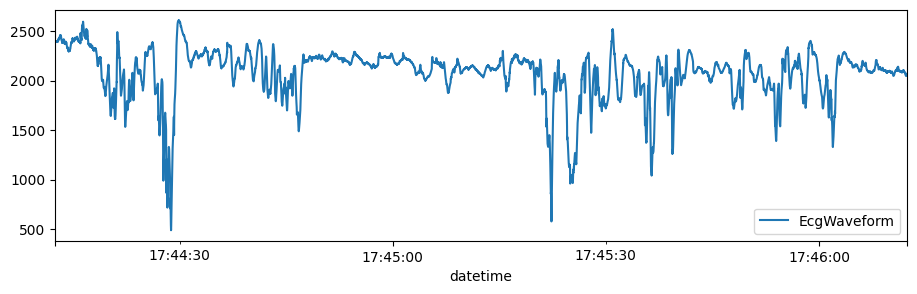

Processing file: /Users/jenniferdanielonwuchekwa/Downloads/diabetes_subset_ecg_data/002/2014_10_03-14_06_08_ECG.csv
Original CSV file size: 157.56 MB
Saved to feather: ../raw_data/ecg/d1namo_t1d_ecg_002.feather (35.03 MB)
Visualizing data from: ../raw_data/ecg/d1namo_t1d_ecg_002.feather


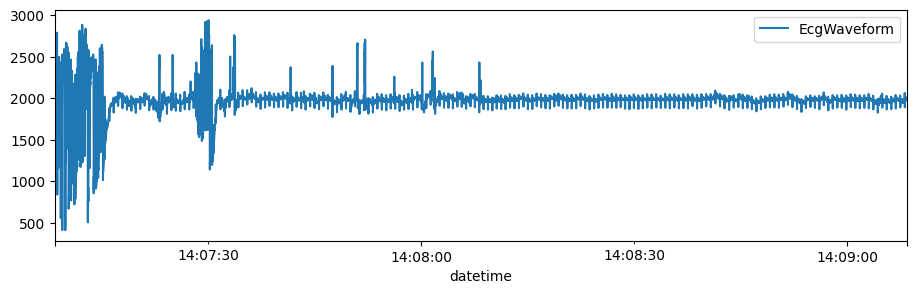

In [10]:
def process_all_data(base_dir, signal_type="EcgWaveform"):
    """
    Processes all sensor data files for all persons in the dataset.
    """
    person_dirs = [os.path.join(base_dir, person) for person in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, person))]
    print(f"Detected person directories: {person_dirs}")

    for person_dir in person_dirs:
        # Extract person_id directly from the folder name
        person_id = os.path.basename(person_dir)
        print(f"\nProcessing data for person {person_id} in directory: {person_dir}")
        process_person_data(person_dir, person_id, signal_type=signal_type)

# Run the preprocessing pipeline
if __name__ == "__main__":
    process_all_data(BASE_DIR, signal_type="EcgWaveform")